# Data Assessment & Analytics
Notes:
- change os directory location
- be aware of the number of provdied native source data files

In [1]:
# working with data
import os
import numpy as np
import pandas as pd
import geopandas as gpd # the library that lets us read in shapefiles
import geoplot as gplt # for plotting maps
import geoplot.crs as gcrs #used to pull in webdata

# visulizaiton
import missingno as msno # creates a matrix chart to show missing values
import plotly.express as px
import plotly.graph_objects as go # for subplot creation
from plotly.subplots import make_subplots # for subplot creation
import matplotlib.pyplot as mplt # use with gplt to save fig to pdf

# Cleanup
from datetime import datetime
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook

In [2]:
# Set Working Directory
workingDir = "G:/Shared drives/WaDE Data/NorthDakota/WaterAllocation" # change here
os.chdir(workingDir)

In [3]:
# This needs to be custom per state

# Input Data
#################################################################
# Data 1: Permits_input
df1 = pd.read_csv('RawinputData/Permits_input.zip')

# # Data 2: -
# df2 = pd.read_csv('RawinputData/WaterRightPOUs_input.zip')

In [4]:
# Input Data - Processed WaDE Input files
#################################################################
dfws = pd.read_csv("ProcessedInputData/watersources.csv").replace(np.nan, "")
dfwspurge = pd.read_csv("ProcessedInputData/watersources_missing.csv").replace(np.nan, "")

dfs = pd.read_csv("ProcessedInputData/sites.csv").replace(np.nan, "")
dfspurge = pd.read_csv("ProcessedInputData/sites_missing.csv").replace(np.nan, "")

dfaa = pd.read_csv("ProcessedInputData/waterallocations.csv").replace(np.nan, "")
dfaapurge = pd.read_csv("ProcessedInputData/waterallocations_missing.csv").replace(np.nan, "")

# Water Source Info
- watersources.csv

In [5]:
print(len(dfws))
dfws.head(1)

372


WaterSourceUUID Geometry GNISFeatureNameCV WaterQualityIndicatorCV  \
0  NDwr_WSwadeID1                                              Fresh   

    WaterSourceName WaterSourceNativeID WaterSourceTypeCV  
0  WaDE Unspecified             wadeID1      Ground Water

<AxesSubplot: >

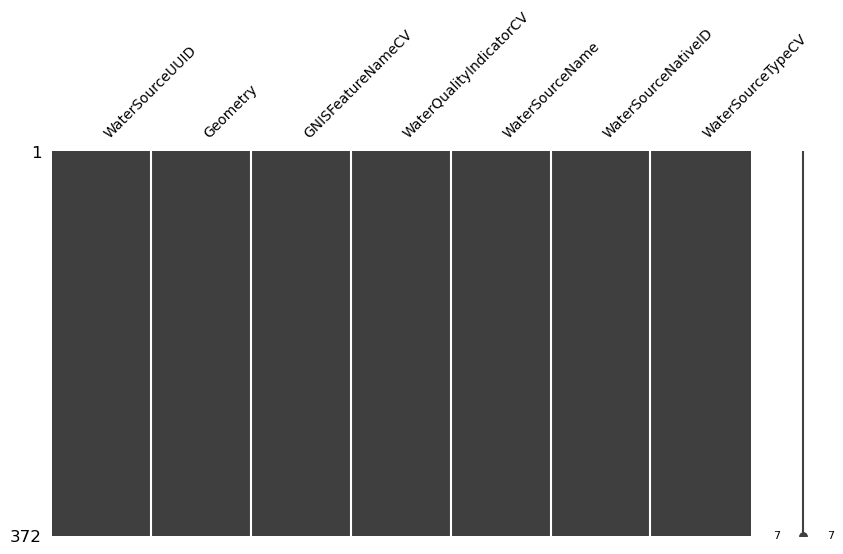

In [6]:
# Check what columns contain missing information.
msno.matrix(dfws, figsize=(10,5), fontsize=10)

In [7]:
# Unique values for 'WaterSourceTypeCV'
for x in dfws['WaterSourceTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"Ground Water",
"Surface Water",


In [8]:
# WaterSourceTypeCV: histogram distribution of WaDE values
print(dfws.WaterSourceTypeCV.value_counts())

fig = px.histogram(dfws, x="WaterSourceTypeCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of WaterSourceTypeCV Entries in watersource.csv",
                  xaxis_title="WaterSourceTypeCV Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('DataAssessment/figures/WaterSourceTypeCV.pdf', engine="kaleido")

Surface Water    363
Ground Water       9
Name: WaterSourceTypeCV, dtype: int64


# Site Info
- sites.csv

In [9]:
print(len(dfs))
dfs.head(1)

3768


SiteUUID RegulatoryOverlayUUIDs WaterSourceUUIDs  \
0  NDwr_SPOD12904705A                          NDwr_WSwadeID1   

  CoordinateAccuracy CoordinateMethodCV    County  EPSGCodeCV Geometry  \
0   WaDE Unspecified   Centroid of Area  Richland        4326            

  GNISCodeCV HUC12 HUC8  Latitude  Longitude NHDNetworkStatusCV NHDProductCV  \
0                        46.01845  -96.60187                                   

  PODorPOUSite          SiteName  SiteNativeID SitePoint        SiteTypeCV  \
0          POD  WaDE Unspecified  POD12904705A            WaDE Unspecified   

  StateCV USGSSiteID  
0      ND

<AxesSubplot: >

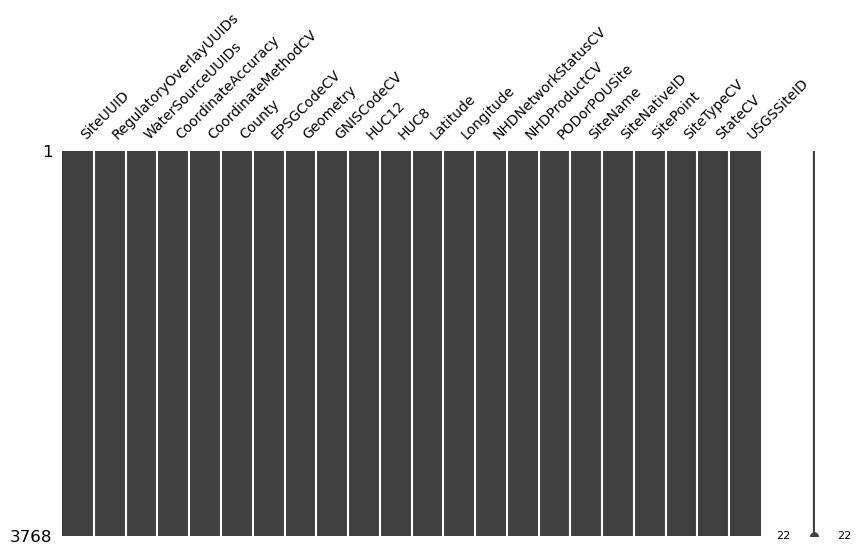

In [10]:
# Check what columns contain missing information.
msno.matrix(dfs, figsize=(10,5), fontsize=10)

In [11]:
# Unique values for 'CoordinateMethodCV'
for x in dfs['CoordinateMethodCV'].sort_values().unique():
    print(f'"' + x + '",')

"Centroid of Area",


In [12]:
# Unique values for 'SiteTypeCV'
for x in dfs['SiteTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"WaDE Unspecified",


In [13]:
# SiteTypeCV: histogram distribution of WaDE values
print(dfs.SiteTypeCV.value_counts())

fig = px.histogram(dfs, x="SiteTypeCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of SiteTypeCV Entries in sites.csv",
                  xaxis_title="SiteTypeCV Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('DataAssessment/figures/SiteTypeCV.pdf', engine="kaleido")

WaDE Unspecified    3768
Name: SiteTypeCV, dtype: int64


In [14]:
# PODorPOUSite: histogram distribution of WaDE values
print(dfs.PODorPOUSite.value_counts())

fig = px.histogram(dfs, x="PODorPOUSite")
fig.update_layout(bargap=0.2,
                  title="Histogram of PODorPOUSite Entries in sites.csv",
                  xaxis_title="PODorPOUSite Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('DataAssessment/figures/PODorPOUSite.pdf', engine="kaleido")

POD    3768
Name: PODorPOUSite, dtype: int64


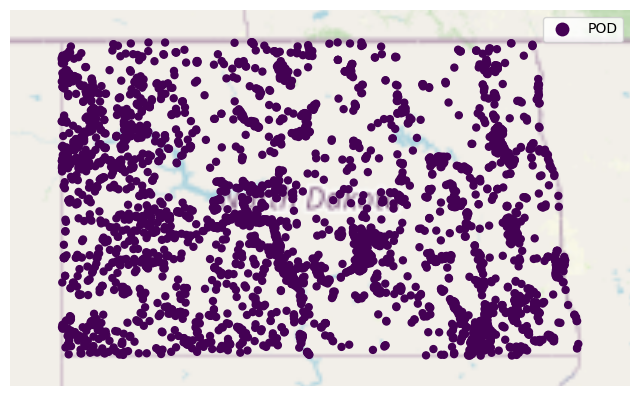

In [15]:
# map the site info (this would be lat & long Points only)
try:
    contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) # use for background map in subplot
    ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator()) # set subplot
    
    dfsPoint = dfs.copy()
    gdfsPoint = gpd.GeoDataFrame(dfsPoint, geometry=gpd.points_from_xy(dfsPoint.Longitude.astype(float), dfsPoint.Latitude.astype(float)), crs="EPSG:4326")
    gplt.pointplot(gdfsPoint, hue='PODorPOUSite', legend=True, legend_var='hue', ax=ax)
    mplt.savefig(format="pdf", fname='DataAssessment/figures/PointMap.pdf')
    
except:
    print('No point data to plot')

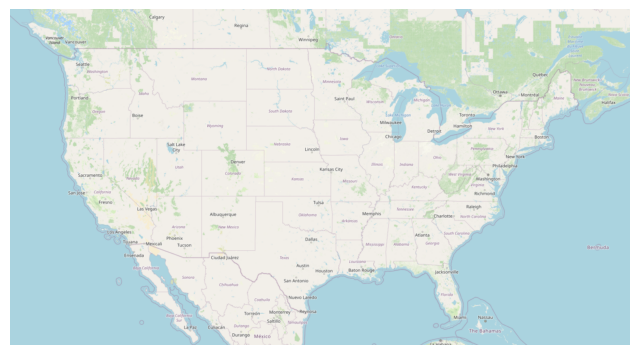

In [16]:
# Map poly info
try:
    contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) # use for background map in subplot
    ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator()) # set subplot
    
    dfsPoly = dfs.copy()
    dfsPoly = dfsPoly[dfsPoly['Geometry'] != ""].reset_index(drop=True)
    dfsPoly['Geometry'] = gpd.GeoSeries.from_wkt(dfsPoly['Geometry'], crs="EPSG:4326")
    gdfsPoly = gpd.GeoDataFrame(dfsPoly, geometry=dfsPoly['Geometry'], crs="EPSG:4326") # covert to geodataframe
    gdfsPoly['Geometry'] = gdfsPoly.simplify(0.001) # simplify the geometry. Lower the number the larger the exported file.
    gplt.polyplot(gdfsPoly, ax=ax)
    mplt.savefig(format="pdf", fname='DataAssessment/figures/PolyMap.pdf')
except:
    print('No geometry data to plot')

In [17]:
dfsPoly.head()

Empty DataFrame
Columns: [SiteUUID, RegulatoryOverlayUUIDs, WaterSourceUUIDs, CoordinateAccuracy, CoordinateMethodCV, County, EPSGCodeCV, Geometry, GNISCodeCV, HUC12, HUC8, Latitude, Longitude, NHDNetworkStatusCV, NHDProductCV, PODorPOUSite, SiteName, SiteNativeID, SitePoint, SiteTypeCV, StateCV, USGSSiteID, geometry]
Index: []

# Allocation Amount Info
- waterallocations.csv

In [18]:
print(len(dfaa))
dfaa.head(1)

3229


AllocationUUID MethodUUID OrganizationUUID             SiteUUID  \
0    NDwr_WR1002    NDwr_M1          NDwr_O1  NDwr_SPOD13908411CC   

  VariableSpecificUUID AllocationApplicationDate  \
0              NDwr_V1                1962-08-02   

  AllocationAssociatedConsumptiveUseSiteIDs  \
0                                             

  AllocationAssociatedWithdrawalSiteIDs AllocationBasisCV  \
0                                        WaDE Unspecified   

  AllocationChangeApplicationIndicator AllocationCommunityWaterSupplySystem  \
0                                                                             

  AllocationCropDutyAmount AllocationExpirationDate  AllocationFlow_CFS  \
0                                                                   0.0   

  AllocationLegalStatusCV AllocationNativeID        AllocationOwner  \
0                  Active               1002  Nd Game And Fish Dept   

  AllocationPriorityDate AllocationSDWISIdentifierCV AllocationTimeframeEnd  \
0             1961-12-28                                                      

  AllocationTimeframeStart  AllocationTypeCV  AllocationVolume_AF  \
0                           WaDE Unspecified                950.0   

  BeneficialUseCategory CommunityWaterSupplySystem CropTypeCV CustomerTypeCV  \
0            Recreation                                                        

  DataPublicationDate DataPublicationDOI  ExemptOfVolumeFlowPriority  \
0          06/02/2023                                              0   

  GeneratedPowerCapacityMW  IrrigatedAcreage IrrigationMethodCV  \
0                                        0.0                      

  LegacyAllocationIDs OwnerClassificationCV PopulationServed PowerType  \
0                         WaDE Unspecified                               

  PrimaryBeneficialUseCategory  \
0                   Recreation   

                            WaterAllocationNativeURL  
0  https://www.swc.nd.gov/info_edu/map_data_resou...

In [19]:
# Unique values for 'AllocationBasisCV'
for x in dfaa['AllocationBasisCV'].sort_values().unique():
    print(f'"' + str(x) + '",')

"WaDE Unspecified",


In [20]:
# Unique values for 'AllocationTypeCV'
for x in dfaa['AllocationTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"WaDE Unspecified",


In [21]:
# Unique values for 'AllocationLegalStatusCV'
for x in dfaa['AllocationLegalStatusCV'].sort_values().unique():
    print(f'"' + x + '",')

"Active",
"WaDE Unspecified",


In [22]:
# Unique values for 'BeneficialUseCategory'
uniqueList = list(set([i.strip() for i in ','.join(dfaa['BeneficialUseCategory'].astype(str)).split(',')]))
uniqueList.sort()
uniqueList

['Domestic',
 'Fish and Wildlife',
 'Flood Control',
 'Industrial',
 'Irrigation',
 'Multiple Use',
 'Municipal',
 'Power Generation',
 'Recreation',
 'Rural Water',
 'Stock']

In [23]:
# Unique values for 'OwnerClassificationCV'
for x in dfaa['OwnerClassificationCV'].sort_values().unique():
    print(f'"' + x + '",')

"Bureau Reclamation (USBR)",
"Bureau of Land Management (USBLM)",
"Fish and Wildlife Service (USFWS)",
"Forest Service (USFS)",
"Military",
"National Park Service (USNPS)",
"Native American",
"Private",
"WaDE Unspecified ",


<AxesSubplot: >

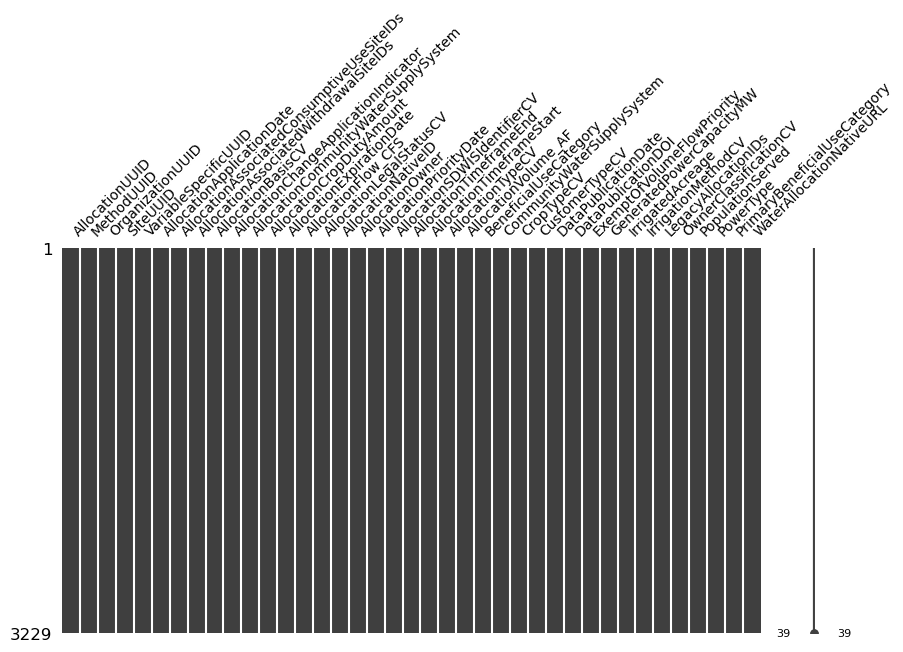

In [24]:
# Check what columns contain missing information.
msno.matrix(dfaa, figsize=(10,5), fontsize=10)

In [25]:
# AllocationFlow_CFS: Boxplot distribution of WaDE values
try:
    trace1 = go.Violin(x=dfaa['AllocationFlow_CFS'], points='outliers', name='Violin Plot')
    trace2 = go.Histogram(x=dfaa['AllocationFlow_CFS'], name='Historgram')

    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=2, col=1)

    fig.update_layout(showlegend=False, bargap=0.2, title="AllocationFlow_CFS Distribution in waterallocations.csv", font=dict(family="Arial Bold", size=12,color="Black"))
    fig.update_xaxes(title_text="AllocationFlow_CFS Value", row=1, col=1)
    fig.update_xaxes(title_text="AllocationFlow_CFS Value", row=2, col=1)
    fig.update_yaxes(title_text="Num. of Records", row=2, col=1)
    fig.show()
    fig.write_image('DataAssessment/figures/AllocationFlow_CFS.pdf', engine="kaleido")

except: print('Could not plot AllocationFlow_CFS value.')

In [26]:
# AllocationVolume_AF: Boxplot distribution of WaDE values
try:
    trace1 = go.Violin(x=dfaa['AllocationVolume_AF'], points='outliers', name='Violin Plot')
    trace2 = go.Histogram(x=dfaa['AllocationVolume_AF'], name='Historgram')

    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=2, col=1)

    fig.update_layout(showlegend=False, bargap=0.2, title="AllocationVolume_AF Distribution in waterallocations.csv", font=dict(family="Arial Bold", size=12,color="Black"))
    fig.update_xaxes(title_text="AllocationVolume_AF Value", row=1, col=1)
    fig.update_xaxes(title_text="AllocationVolume_AF Value", row=2, col=1)
    fig.update_yaxes(title_text="Num. of Records", row=2, col=1)
    fig.show()
    fig.write_image('DataAssessment/figures/AllocationVolume_AF.pdf', engine="kaleido")

except: print('Could not plot AllocationVolume_AF value.')

In [27]:
# AllocationLegalStatusCV: histogram distribution of WaDE values
print(dfaa.AllocationLegalStatusCV.value_counts())

fig = px.histogram(dfaa, x="AllocationLegalStatusCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of AllocationLegalStatusCV Entries in waterallocations.csv",
                  xaxis_title="AllocationLegalStatusCV Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('DataAssessment/figures/AllocationLegalStatusCV.pdf', engine="kaleido")

Active              3226
WaDE Unspecified       3
Name: AllocationLegalStatusCV, dtype: int64


In [28]:
# OwnerClassificationCV: histogram distribution of WaDE values
print(dfaa.OwnerClassificationCV.value_counts())

fig = px.histogram(dfaa, x="OwnerClassificationCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of OwnerClassificationCV Entries in waterallocations.csv",
                  xaxis_title="OwnerClassificationCV Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('DataAssessment/figures/OwnerClassificationCV.pdf', engine="kaleido")

WaDE Unspecified                     2646
Private                               455
Fish and Wildlife Service (USFWS)      84
Forest Service (USFS)                  21
Native American                         7
Bureau Reclamation (USBR)               6
National Park Service (USNPS)           5
Military                                3
Bureau of Land Management (USBLM)       2
Name: OwnerClassificationCV, dtype: int64


In [29]:
# PrimaryBeneficialUseCategory: histogram distribution of WaDE values
print(dfaa.PrimaryBeneficialUseCategory.value_counts())

fig = px.histogram(dfaa, x="PrimaryBeneficialUseCategory")
fig.update_layout(bargap=0.2,
                  title="Histogram of PrimaryBeneficialUseCategory Entries in waterallocations.csv",
                  xaxis_title="PrimaryBeneficialUseCategory Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('DataAssessment/figures/PrimaryBeneficialUseCategory.pdf', engine="kaleido")

Agriculture Irrigation    1861
Commercial/Industrial      417
In-stream Flow             323
Public Supply              293
Recreation                 169
Livestock                   80
Other                       49
Domestic                    30
Hydroelectric                7
Name: PrimaryBeneficialUseCategory, dtype: int64


In [30]:
# ExemptOfVolumeFlowPriority: histogram distribution of WaDE values
print(dfaa.ExemptOfVolumeFlowPriority.value_counts())

fig = px.histogram(dfaa, x="ExemptOfVolumeFlowPriority")
fig.update_layout(bargap=0.2,
                  title="Histogram of ExemptOfVolumeFlowPriority Entries in waterallocations.csv",
                  xaxis_title="ExemptOfVolumeFlowPriority Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('DataAssessment/figures/ExemptOfVolumeFlowPriority.pdf', engine="kaleido")

0    3229
Name: ExemptOfVolumeFlowPriority, dtype: int64


In [31]:
# AllocationPriorityDate: histogram distribution of WaDE values
print(dfaa.AllocationPriorityDate.value_counts())

dfaaCopy = dfaa.copy()
dfaaCopy = dfaaCopy[(dfaaCopy['ExemptOfVolumeFlowPriority'] < 1)]
dfaaCopy = dfaaCopy.reset_index(drop=True)
fig = px.histogram(dfaaCopy, x="AllocationPriorityDate")
fig.update_layout(bargap=0.2,
                  title="Histogram of AllocationPriorityDate Entries in waterallocations.csv",
                  xaxis_title="AllocationPriorityDate Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('DataAssessment/figures/AllocationPriorityDate.pdf', engine="kaleido")

2005-05-31    12
1991-04-25    11
1990-05-08     9
2011-05-02     9
1976-03-08     8
              ..
1981-10-19     1
1981-04-14     1
1981-06-18     1
1981-06-03     1
1901-06-20     1
Name: AllocationPriorityDate, Length: 2554, dtype: int64


# Merge all figure pdfs into single output pdf

In [32]:
# merge all figure pdfs into single output pdf

'''
Notes:
'merger' is used for merging multiple files into one and merger.append(absfile) will append 
 the files one by one until all pdfs are appended in the result file.
'''

from PyPDF2 import PdfFileMerger

# If files are saved in the folder 'C:\Users' then Full_Path will be replaced with C:\Users
filePath = str(os.getcwd()) + '/DataAssessment/figures'
pdfsList = os.listdir(filePath)
print(pdfsList)


# os.listdir will create the list of all files in a directory
merger = PdfFileMerger(strict=False)

for file in pdfsList:
    if file.endswith(".pdf"):
        path_with_file = os.path.join(filePath, file)
        print(path_with_file)
        merger.append(path_with_file,  import_bookmarks=False )
merger.write("DataAssessment/Figures Merged Copy.pdf")

merger.close()

['WaterSourceTypeCV.pdf', 'SiteTypeCV.pdf', 'PODorPOUSite.pdf', 'PointMap.pdf', 'PolyMap.pdf', 'AllocationFlow_CFS.pdf', 'AllocationVolume_AF.pdf', 'AllocationLegalStatusCV.pdf', 'OwnerClassificationCV.pdf', 'PrimaryBeneficialUseCategory.pdf', 'ExemptOfVolumeFlowPriority.pdf', 'AllocationPriorityDate.pdf']
G:\Shared drives\WaDE Data\NorthDakota\WaterAllocation/DataAssessment/figures\WaterSourceTypeCV.pdf
G:\Shared drives\WaDE Data\NorthDakota\WaterAllocation/DataAssessment/figures\SiteTypeCV.pdf


C:\Users\rjame\anaconda3\lib\site-packages\PyPDF2\_utils.py:411: UserWarning:

import_bookmarks is deprecated as an argument. Use import_outline instead



G:\Shared drives\WaDE Data\NorthDakota\WaterAllocation/DataAssessment/figures\PODorPOUSite.pdf
G:\Shared drives\WaDE Data\NorthDakota\WaterAllocation/DataAssessment/figures\PointMap.pdf
G:\Shared drives\WaDE Data\NorthDakota\WaterAllocation/DataAssessment/figures\PolyMap.pdf
G:\Shared drives\WaDE Data\NorthDakota\WaterAllocation/DataAssessment/figures\AllocationFlow_CFS.pdf
G:\Shared drives\WaDE Data\NorthDakota\WaterAllocation/DataAssessment/figures\AllocationVolume_AF.pdf
G:\Shared drives\WaDE Data\NorthDakota\WaterAllocation/DataAssessment/figures\AllocationLegalStatusCV.pdf
G:\Shared drives\WaDE Data\NorthDakota\WaterAllocation/DataAssessment/figures\OwnerClassificationCV.pdf
G:\Shared drives\WaDE Data\NorthDakota\WaterAllocation/DataAssessment/figures\PrimaryBeneficialUseCategory.pdf
G:\Shared drives\WaDE Data\NorthDakota\WaterAllocation/DataAssessment/figures\ExemptOfVolumeFlowPriority.pdf
G:\Shared drives\WaDE Data\NorthDakota\WaterAllocation/DataAssessment/figures\AllocationPri

# Removed Records compared to Source Data
- this is working just fine
- just want to comment out temporarily

In [33]:
# Explode purge.xlsx files by WaDEUUID, concat together
#################################################################

# Explode watersources_missing.xlsx records by WaDEUUID
dfwspurgeCopy = dfwspurge.assign(WaDEUUID=dfwspurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
dfwspurgeCopy = dfwspurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# Explode sites_missing.xlsx records by WaDEUUID
dfspurgeCopy = dfspurge.assign(WaDEUUID=dfspurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
dfspurgeCopy = dfspurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# Explode waterallocations_missing.xlsx records by WaDEUUID
dfaapurgeCopy = dfaapurge.assign(WaDEUUID=dfaapurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
dfaapurgeCopy = dfaapurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# concat purge dataframes togehter
frames = [dfwspurgeCopy, dfspurgeCopy, dfaapurgeCopy] 
dfWaDEUUID = pd.concat(frames)
dfWaDEUUID = dfWaDEUUID.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(dfWaDEUUID))
dfWaDEUUID.head(1)

2920


WaDEUUID              ReasonRemoved IncompleteField
0  ndwr11855  Unused WaterSource Record

In [34]:
# this is custom to the provided data

# attach purge dataframe to Native Source Data
# df1: Permits_input
#################################################################

if 'ReasonRemoved' in df1:
    df1 = df1.drop(['ReasonRemoved', 'IncompleteField'], axis=1)

df1Copy = dfWaDEUUID.merge(df1, how='right', on='WaDEUUID')
df1Copy = df1Copy.groupby('WaDEUUID').agg(lambda x: ','.join([str(elem) for elem in (list(set(x))) if elem!=''])).replace(np.nan, "").reset_index()
df1Copy.to_csv('RawInputData/Permits_input.zip', compression=dict(method='zip', archive_name='Permits_input.csv'), index=False)

In [35]:
# # this is custom to the provided data

# # attach purge dataframe to Native Source Data
# # df2: WaterRightPOUs_input
# #################################################################

# if 'ReasonRemoved' in df2:
#     df2 = df2.drop(['ReasonRemoved', 'IncompleteField'], axis=1)

# df2Copy = dfWaDEUUID.merge(df2, how='right', on='WaDEUUID')
# df2Copy = df2Copy.groupby('WaDEUUID').agg(lambda x: ','.join([str(elem) for elem in (list(set(x))) if elem!=''])).replace(np.nan, "").reset_index()
# df2Copy.to_csv('RawInputData/WaterRightPOUs_input.zip', compression=dict(method='zip', archive_name='WaterRightPOUs_input.csv'), index=False)

# Custom Queries and Analysis for this Dataset

In [36]:
# asdf